Null values per column:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
Nulls after dropping:
 App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


C:\Users\yalla\AppData\Local\Temp\ipykernel_29552\208517004.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Size'] = df['sizeValue'] * is_mb.replace({True: 1000, False: 1})


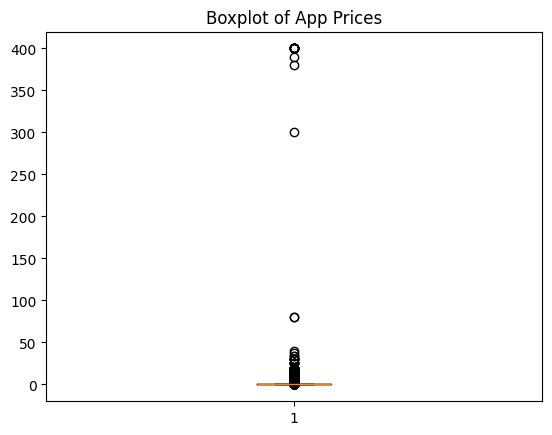

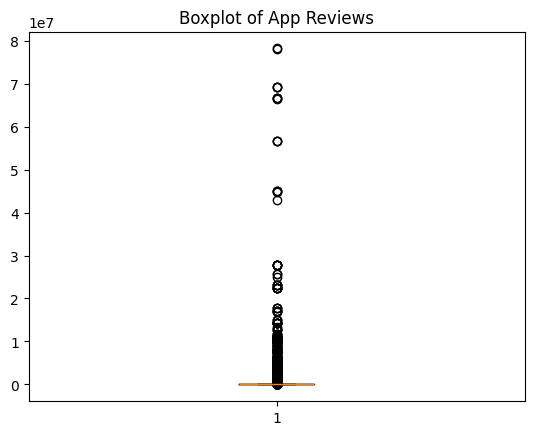

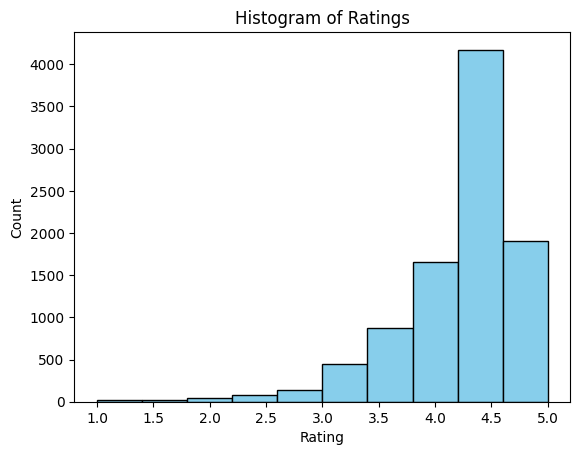

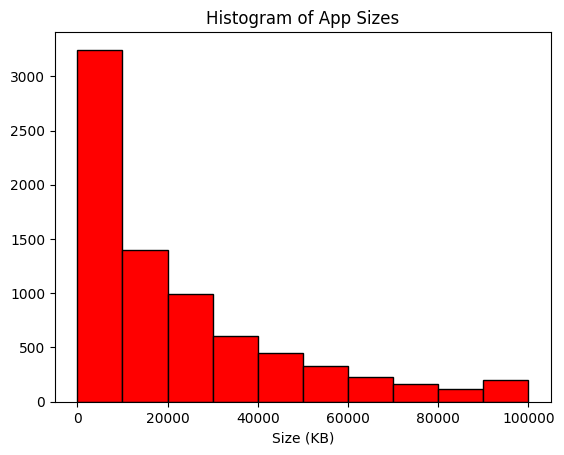

Apps with very high prices:
                                  App   Price
4197          most expensive app (H)  399.99
4362                      💎 I'm rich  399.99
4367        I'm Rich - Trump Edition  400.00
5351                       I am rich  399.99
5354                  I am Rich Plus  399.99
5355                   I am rich VIP  299.99
5356               I Am Rich Premium  399.99
5357             I am extremely Rich  379.99
5358                      I am Rich!  399.99
5359              I am rich(premium)  399.99
5362                   I Am Rich Pro  399.99
5364  I am rich (Most expensive app)  399.99
5366                       I Am Rich  389.99
5369                       I am Rich  399.99
5373              I AM RICH PRO PLUS  399.99
Apps with reviews > 2 million:
                                             App   Reviews
139                        Wattpad 📖 Free Books   2914724
335    Messenger – Text and Video Chat for Free  56642847
336                          WhatsApp Messeng

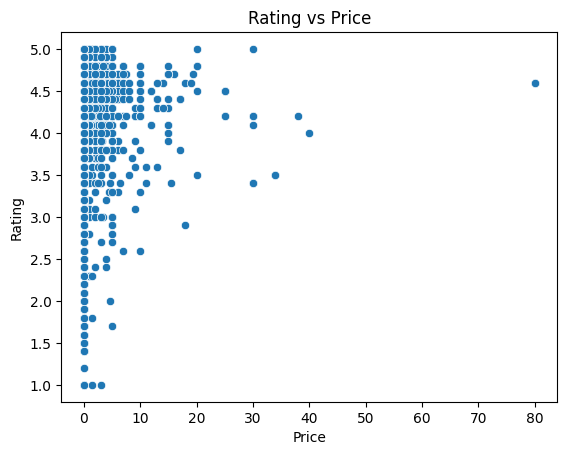

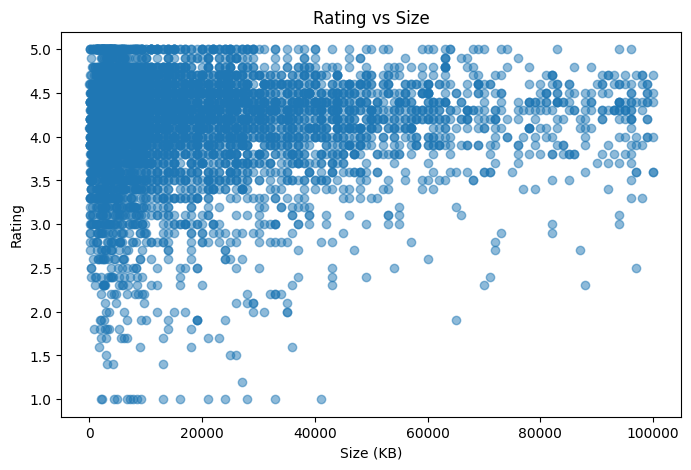

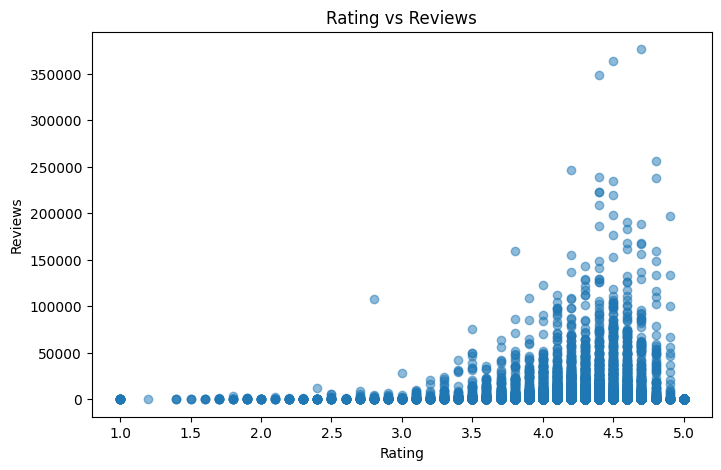

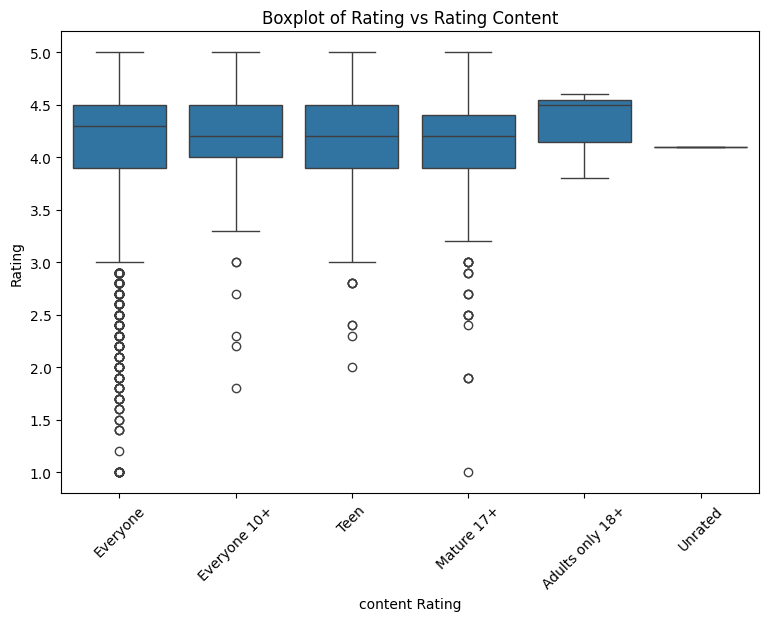

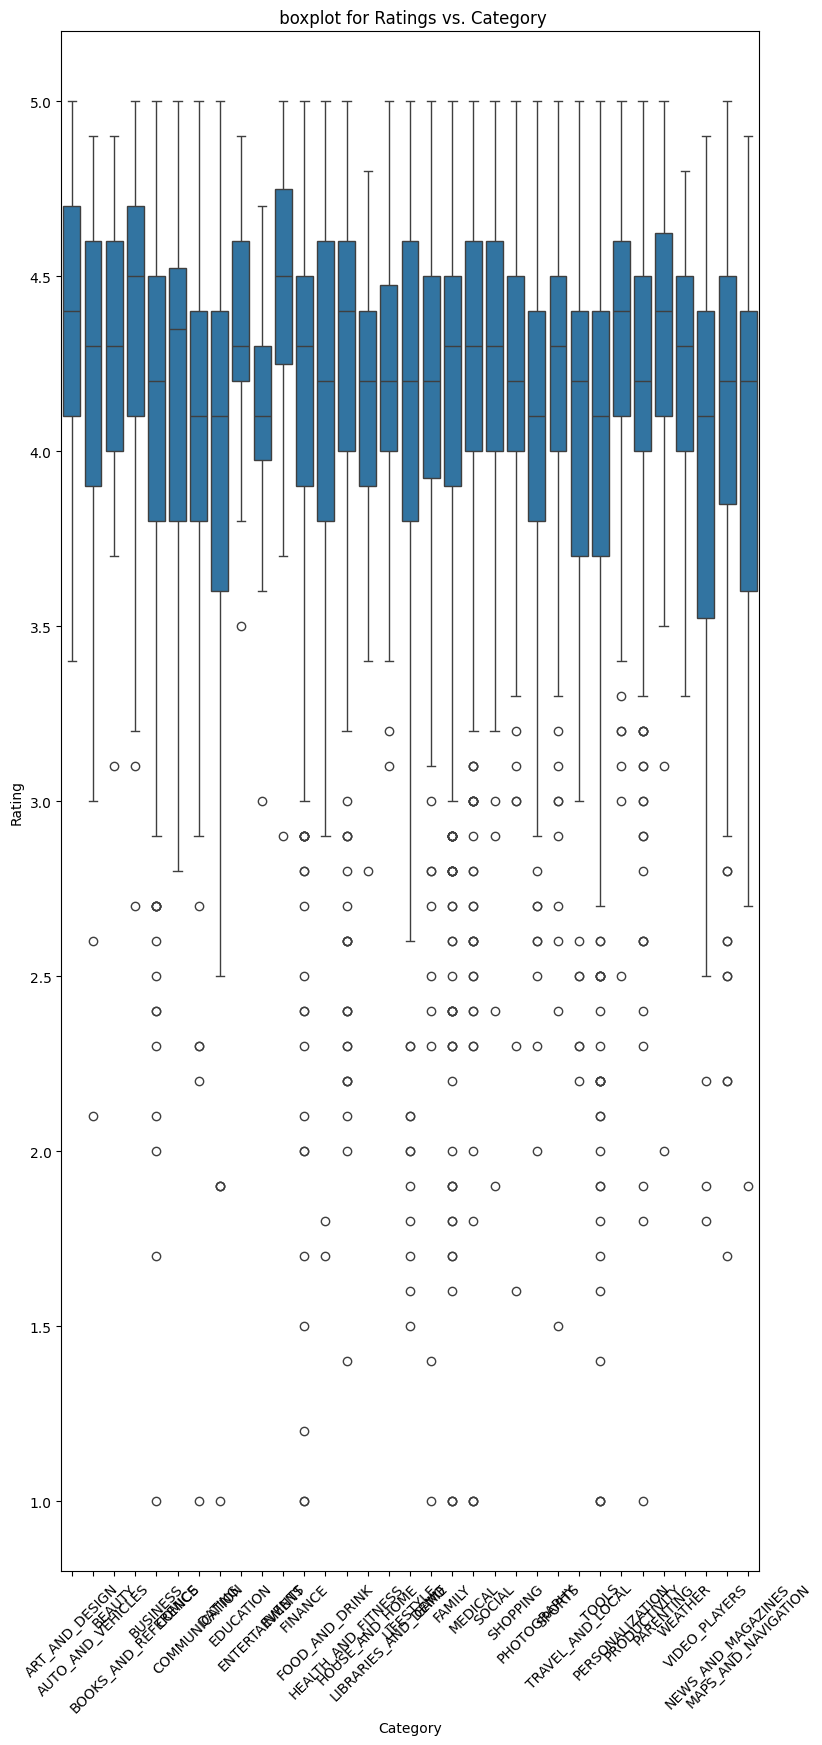

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'sizeValue',
       'Cat_AUTO_AND_VEHICLES', 'Cat_BEAUTY', 'Cat_BOOKS_AND_REFERENCE',
       'Cat_BUSINESS',
       ...
       'Gen_Travel & Local;Action & Adventure', 'Gen_Trivia',
       'Gen_Video Players & Editors', 'Gen_Weather', 'Gen_Word', 'CR_Everyone',
       'CR_Everyone 10+', 'CR_Mature 17+', 'CR_Teen', 'CR_Unrated'],
      dtype='object', length=150)
columns        Rating   Reviews     Size   Installs  Price  sizeValue  \
0         4.1  5.075174  19000.0   9.210440    0.0       19.0   
1         3.9  6.875232  14000.0  13.122365    0.0       14.0   
4         4.3  6.875232   2800.0  11.512935    0.0        2.8   
5         4.4  5.123964   5600.0  10.819798    0.0        5.6   
6         3.8  5.187386  19000.0  10.819798    0.0       19.0   
...       ...       ...      ...        ...    ...        ...   
10833     4.8  3.806662    619.0   6.908755    0.0      619.0   
10834     4.0  2.079442   2600.0   6.216606    0.0

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('googleplaystore.csv')

# 1. Check and drop nulls
print("Null values per column:\n", df.isnull().sum())
df = df.dropna()
print("Nulls after dropping:\n", df.isnull().sum())

# 2. Clean 'Size' column
df['Size'] = df['Size'].str.strip().str.replace(" ", "").str.lower()
df['sizeValue'] = df['Size'].str.extract(r'(\d+\.?\d*)').astype(float)
is_mb = df['Size'].str.contains('m', case=False, na=False)
df['Size'] = df['sizeValue'] * is_mb.replace({True: 1000, False: 1})

# 3. Clean 'Installs' column
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '').astype(int)

# 4. Clean 'Price' column
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 5. Clean 'Reviews' column
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# 6. Clean 'Rating' column & drop invalid ratings
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

# 7. Sanity checks
df = df[df['Reviews'] <= df['Installs']]  # Reviews should not be more than installs
df = df[~((df['Type'] == 'Free') & (df['Price'] > 0))]  # Free apps should not have price > 0

# 8. Univariate Analysis
plt.boxplot(df['Price'].dropna())
plt.title('Boxplot of App Prices')
plt.show()

plt.boxplot(df['Reviews'].dropna())
plt.title('Boxplot of App Reviews')
plt.show()

plt.hist(df['Rating'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

plt.hist(df['Size'].dropna(), bins=10, color='red', edgecolor='black')
plt.title('Histogram of App Sizes')
plt.xlabel('Size (KB)')
plt.show()

# 9. Outlier Treatment
# High Price
print("Apps with very high prices:\n", df[df['Price'] > 200][['App', 'Price']])
df = df[df['Price'] <= 200]

# High Reviews
print("Apps with reviews > 2 million:\n", df[df['Reviews'] > 2_000_000][['App', 'Reviews']])
df = df[df['Reviews'] < 2_000_000]

# Installs: Percentile cutoff
percentiles = df['Installs'].quantile([0.10, 0.25, 0.50, 0.70, 0.90, 0.95, 0.99])
print("Install percentiles:\n", percentiles)

cutoff = df['Installs'].quantile(0.70)
df = df[df['Installs'] <= cutoff]

# 10. Bivariate Analysis
sns.scatterplot(x='Price', y='Rating', data=df)   #Make scatter plot/joinplot for Rating vs. PriceWhat pattern do you observe? Does rating increase with price?
plt.title('Rating vs Price')
plt.show()

plt.figure(figsize=(8, 5))      
plt.scatter(df['Size'], df['Rating'], alpha=0.5)    #Make scatter plot/joinplot for Rating vs. SizeAre heavier apps rated better?
plt.xlabel('Size (KB)')
plt.ylabel('Rating')
plt.title('Rating vs Size')
plt.show()


plt.figure(figsize=(8,5))
plt.scatter(df['Rating'], df['Reviews'], alpha=0.5)    
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Rating vs Reviews')
plt.show()


plt.figure(figsize=(9,6))
sns.boxplot(x='Content Rating', y='Rating', data=df )
plt.xticks(rotation=45)
plt.title('Boxplot of Rating vs Rating Content')
plt.xlabel('content Rating')
plt.ylabel('Rating')
plt.show()


plt.figure(figsize=(9,20))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=45)
plt.title(" boxplot for Ratings vs. Category")
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()

#Data PreProcessing 

inp1 = df.copy() # copy the dataset to inp1
inp1['Reviews']= np.log1p(df['Reviews'])  # apply transformation
inp1['Installs']= np.log1p(df['Installs'])

todoList= ['Apps','Last Updated', 'Current Ver', 'Andriod Ver']
col_del= [col for col in todoList if col in inp1.columns]

inp1= inp1.drop(columns=col_del)                 



inp2 = pd.get_dummies(
    inp1,
    columns=['Category', 'Genres', 'Content Rating'],
    prefix=['Cat', 'Gen', 'CR'],       # optional: shorter prefixes
    drop_first=True,                  # keep all levels (you can set True to drop one per group)
    dtype=int
)

numeric_data = inp2.select_dtypes(include=['number'])

print(numeric_data.columns)

from sklearn.model_selection import train_test_split

# 70% train, 30% test


df_train, df_test = train_test_split(
    numeric_data,
    test_size=0.30,
    random_state=42
    
)

print("columns",numeric_data)

# Verify shapes
print("Train set shape:", df_train.shape)
print("Test set shape: ", df_test.shape)

x= numeric_data.drop(columns=["Installs"])
y= numeric_data["Installs"]
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Align y with cleaned X
X_test = X_test.dropna()
y_test = y_test[X_test.index]


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Initialize the model
model = LinearRegression()

# 2. Train the model on the training data
model.fit(X_train, y_train)

# 3. Predict on the test data
y_pred = model.predict(X_test)

# 4. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)